<a href="https://colab.research.google.com/github/mattbowman2/notebooks/blob/main/notebooks/colab/01_consulting/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Professional Service Simulation

Aim: I want to see if I can model a professional service firm, so I can do what if scenarios or trial different metrics.

## Trying to Model The RFP Frequency

[11.63575603 -2.72421463  4.07503393  1.20082255 -8.30926245 15.3484178
  6.38863427  3.89318711 -9.40615919  3.14024278]


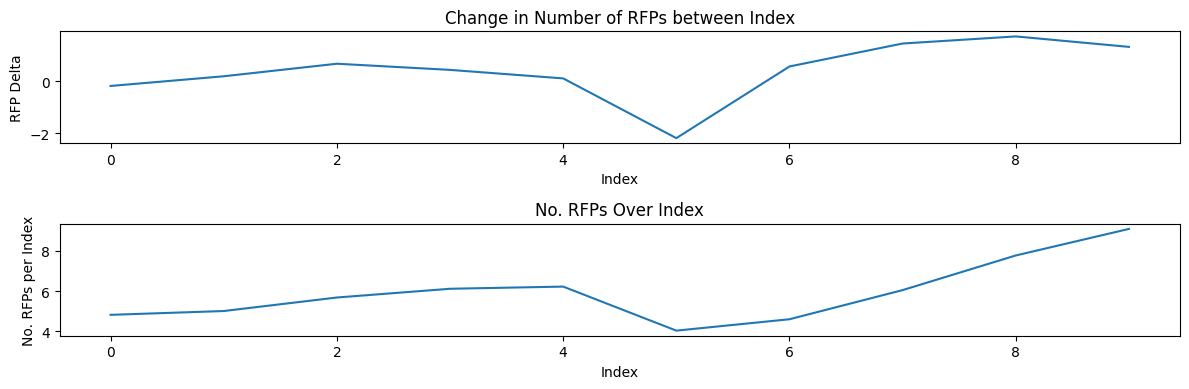

In [37]:
import numpy as np

n = 10

samples = np.random.normal(loc=0, scale=10, size=n)
print(samples)
import matplotlib.pyplot as plt

# CALIBRATION
prior_value = 5
values = []
deltas = []

# STEP THROUGHS
for i in range(n):
  delta = np.random.normal(loc=0, scale=1, size=n)[0]
  value = prior_value + delta

  # UPDATE
  prior_value = value
  values.append(value)
  deltas.append(delta)

# Create figure with 2 subplots (side by side)
fig, axes = plt.subplots(2, 1, figsize=(12, 4))

# Line plot
axes[0].plot(deltas)
axes[0].set_xlabel("Index")
axes[0].set_ylabel("RFP Delta")
axes[0].set_title("Change in Number of RFPs between Index")

axes[1].plot(values)
axes[1].set_xlabel("Index")
axes[1].set_ylabel("No. RFPs per Index")
axes[1].set_title("No. RFPs Over Index")

plt.tight_layout()
plt.show()

## Try to Make the Applicant



In [ ]:
# Applicant:
# - They can only apply to so many RFPs per month
# - They have a hit rate

## Try to Make the RFP

Behaviour:

- RFPs have a delay between closing date
- RFPs have a failure or success based on the hit rate
  - If they are successful, they will clear the gate between time
  - If they are unsucessful, there is a probability they will be told they made it to a new round.

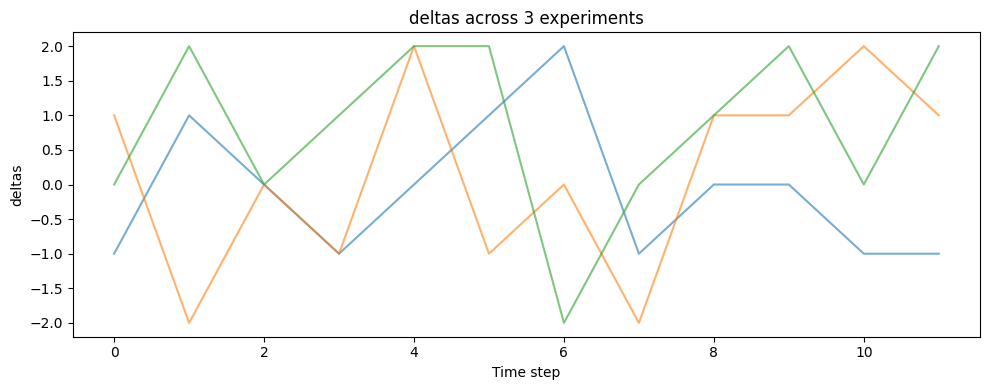

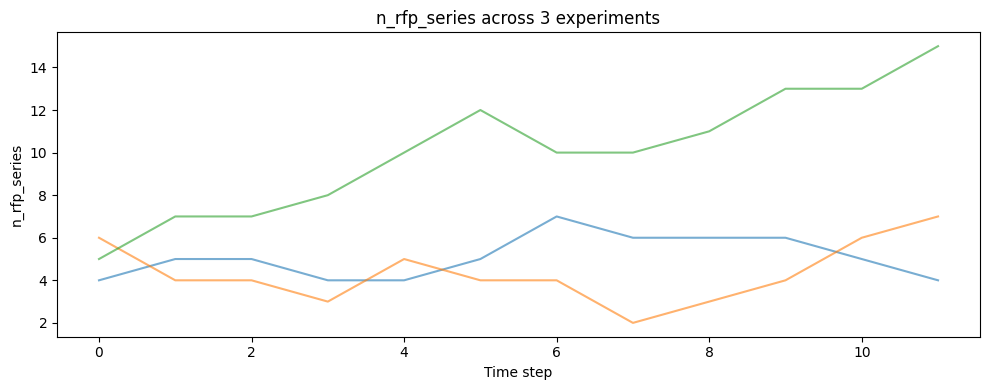

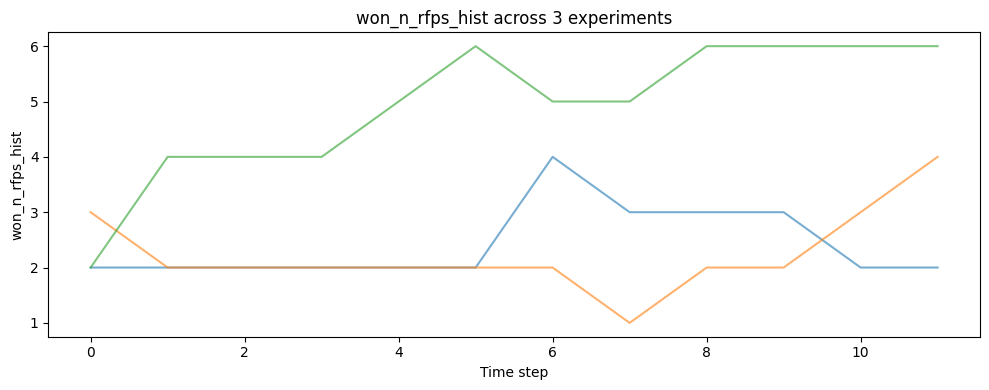

In [74]:
import numpy as np

# class Rfp():
#   "Simple Model with only 1 round after close"
#   def __init__(self, id, start_t):
#     self.id = id
#     self.open = True

#     self.start_t = start_t
#     self.open_duration = 0.5
#     self.close_duration = 0.5

#     self.close_t = start_t + self.open_duration
#     self.resolved_t = start_t + self.open_duration + self.close_duration

#     # self.p_told_a_candidate = 0.5

#     self.hit_rate = None
#     self.success = None

#   def close(self):
#     self.open = False

#   # def told_a_candidate(self):
#   #   return np.random.choice([True, False], p=[self.p_told_a_candidate])

#   def apply_to_rfp(self, hit_rate):
#     self.hit_rate = hit_rate
#     self.success = np.random.choice([True, False], p=[hit_rate])

# class Rfp_Manager():
#   def __init__(self):
#     self.rfps = []
#     self.id = 0

#   def close_rfp(self, rfp_id):
#     for rfp in self.rfps:
#       if rfp.id == rfp_id:
#         rfp.close()

#   def apply_to_rfp(self, rfp_id, hit_rate):
#     for rfp in self.rfps:
#       if rfp.id == rfp_id:
#         rfp.apply_to_rfp(hit_rate)

#   def assess_if_new_rfp(self, prob_of_rfp = 0.5):
#     "Has a probability of generating a new RFP."
#     new_rfp = np.random.choice([True, False], p=[prob_of_rfp])
#     if new_rfp:
#       print("New RFP")
#       rfp = Rfp(self.id)
#       self.rfps.append(rfp)
#       self.id += 1
#     else:
#       print("No RFP")



def run_experiment():
  N = 12
  # rfp_manager = Rfp_Manager()
  worker_hit_rate = 0.5

  # CALIBRATION
  n_rfp_prior = 5
  deltas = []
  n_rfp_series = []
  won_n_rfps_hist = []

  # Simulation Loop
  for i in range(N):
    # Calculate number of RFPs
    delta = round(np.random.normal(loc=0.25, scale=1, size=n)[0])
    n_rfps = n_rfp_prior + delta
    if n_rfps < 0:
      n_rfps = 0

    # Worker applies to rfps
    _n_rfps = 12
    if n_rfp_prior > _n_rfps:
      won_n_rfps = round(_n_rfps*worker_hit_rate)
    else:
      won_n_rfps = round(n_rfps*worker_hit_rate)

    # Record values
    deltas.append(delta)
    n_rfp_series.append(n_rfps)
    won_n_rfps_hist.append(won_n_rfps)

    # Update value for next timestep
    n_rfp_prior = n_rfps

  # # Create figure with 2 subplots (side by side)
  # fig, axes = plt.subplots(3, 1, figsize=(12, 4))
  # # Line plot
  # axes[0].plot(deltas)
  # axes[1].plot(n_rfp_series)
  # axes[2].plot(won_n_rfps_hist)
  # plt.tight_layout()
  # plt.show()
  return {
    "deltas": deltas,
    "n_rfp_series": n_rfp_series,
    "won_n_rfps_hist": won_n_rfps_hist
  }

# -------------------------------------------
# Run MANY experiments
# -------------------------------------------
num_experiments = 3
attributes = ["deltas", "n_rfp_series", "won_n_rfps_hist"]

# Storage: attribute → list of experiment time series
results = {attr: [] for attr in attributes}

for _ in range(num_experiments):
    exp_output = run_experiment()
    for attr in attributes:
        results[attr].append(exp_output[attr])


# -------------------------------------------
# Plot: one figure per attribute (overlay experiments)
# -------------------------------------------
for attr in attributes:
    plt.figure(figsize=(10, 4))
    for exp_i in range(num_experiments):
        plt.plot(results[attr][exp_i], alpha=0.6, label=f"Exp {exp_i+1}")

    plt.title(f"{attr} across {num_experiments} experiments")
    plt.xlabel("Time step")
    plt.ylabel(attr)
    # plt.legend()
    plt.tight_layout()
    plt.show()

I was doing some reading on this topic. This approach is bit too basic that is not representative of the situation.